# Author : Sandaru Malshan
# Peer Reviewer :[Pulith]
# Date of peer Review:[]

I used and adapted code snippets from Tutorials week 3,4 and 6

In [1]:
# installing the data manipulations library
!pip install pandas

## Import some Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_auc_score, roc_curve)

import warnings
warnings.filterwarnings("ignore")

print("Import Required Libraries")

Import Required Libraries


## Load the Dataset

In [3]:
print("===========================================================")
print("Load the Cleaned Classification Dataset (from Notebook 1)")
print("===========================================================")
data_frame = pd.read_csv("/content/classification_dataset.csv")

data_frame.info()

Load the Cleaned Classification Dataset (from Notebook 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3723 non-null   float64
 1   Sex                     3723 non-null   int64  
 2   T_Stage                 3723 non-null   int64  
 3   N_Stage                 3723 non-null   int64  
 4   6th_Stage               3723 non-null   int64  
 5   Differentiated          3723 non-null   int64  
 6   Grade                   3723 non-null   int64  
 7   A_Stage                 3723 non-null   int64  
 8   Tumor_Size              3723 non-null   float64
 9   Estrogen_Status         3723 non-null   int64  
 10  Progesterone_Status     3723 non-null   int64  
 11  Regional_Node_Examined  3723 non-null   float64
 12  Reginol_Node_Positive   3723 non-null   int64  
 13  Mortality_Status        3723 non-nu

##Selecting Feature

In [4]:
x = data_frame.drop("Mortality_Status", axis=1)
y = data_frame["Mortality_Status"]

print("==== x data ====")
print(x.head())
print("\n==== y data ====\n")
print(y.head())

==== x data ====
    Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0  68.0    1        0        0          0               1      3        1   
1  50.0    1        1        1          2               0      2        1   
2  58.0    1        2        2          4               0      2        1   
3  58.0    1        0        0          0               1      3        1   
4  47.0    1        1        0          1               1      3        1   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0         4.0                1                    1                    24.0   
1        35.0                1                    1                    14.0   
2        63.0                1                    1                    14.0   
3        18.0                1                    1                     2.0   
4        41.0                1                    1                     3.0   

   Reginol_Node_Positive  
0                 

### Data Standardization

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)
print(x[:5])


[[ 1.55833682  0.0697015  -0.99454911 -0.60124694 -0.99735586  0.30183191
   1.34732551  0.13943243 -1.52264696  0.25838378  0.45174665  1.38134667
  -0.61385628]
 [-0.45408073  0.0697015   0.41923719  0.89603892  0.63122128 -0.67616653
  -0.22364     0.13943243  0.54336902  0.25838378  0.45174665  0.02183688
   0.24450501]
 [ 0.44032707  0.0697015   1.8330235   2.39332477  2.25979841 -0.67616653
  -0.22364     0.13943243  2.40944797  0.25838378  0.45174665  0.02183688
   0.67368566]
 [ 0.44032707  0.0697015  -0.99454911 -0.60124694 -0.99735586  0.30183191
   1.34732551  0.13943243 -0.58960748  0.25838378  0.45174665 -1.60957488
  -0.61385628]
 [-0.78948365  0.0697015   0.41923719 -0.60124694 -0.18306729  0.30183191
   1.34732551  0.13943243  0.94324308  0.25838378  0.45174665 -1.4736239
  -0.61385628]]


### Divide data set training and testing

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
print('Whole Data shape', data_frame.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

Whole Data shape (3723, 14)
X_train shape (2978, 13)
X_test shape (745, 13)


### PCA (Dimensionality Reduction)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.27245995 0.12769695 0.11313378 0.09669105 0.07767888]


# Train and Evaluate Classifiers

### Logistic Regression

In [8]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
pread =lr.predict(X_test_pca)

In [9]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' : pread })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
3446,0,0
3712,0,0
2899,1,0
1041,0,0
1152,0,0
...,...,...
3536,0,0
310,0,0
424,0,0
3563,0,0


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       639
           1       0.62      0.09      0.16       106

    accuracy                           0.86       745
   macro avg       0.75      0.54      0.54       745
weighted avg       0.83      0.86      0.82       745



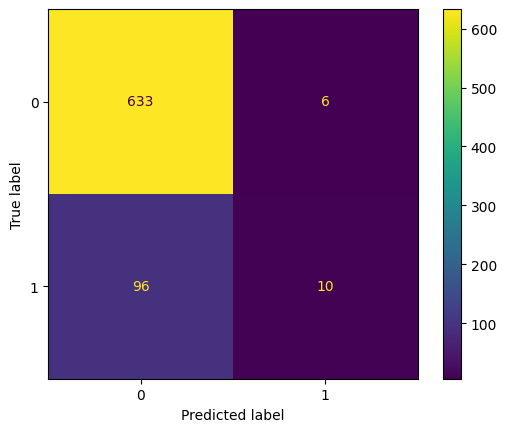

In [10]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, pread, labels=lr.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,pread))

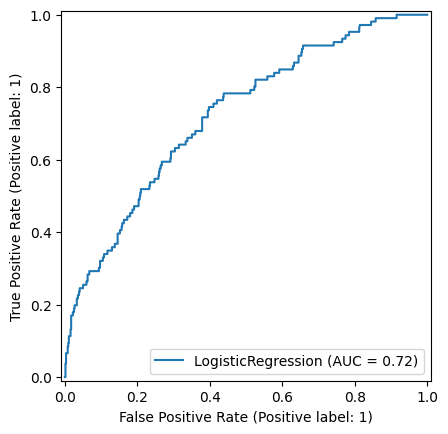

In [11]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
Logreg_roc = RocCurveDisplay.from_estimator(lr, X_test_pca, y_test)




### Naive Bayes

In [12]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
Naive_pread =nb.predict(X_test_pca)

In [13]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' : Naive_pread  })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
3446,0,0
3712,0,0
2899,1,0
1041,0,0
1152,0,0
...,...,...
3536,0,0
310,0,0
424,0,0
3563,0,0


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       639
           1       0.40      0.25      0.31       106

    accuracy                           0.84       745
   macro avg       0.64      0.60      0.61       745
weighted avg       0.81      0.84      0.82       745



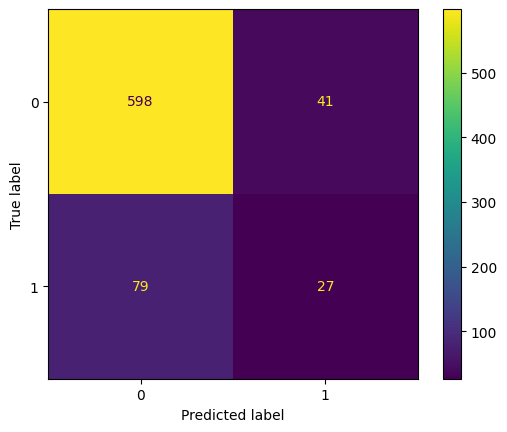

In [14]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, Naive_pread , labels=nb.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=nb.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,Naive_pread))

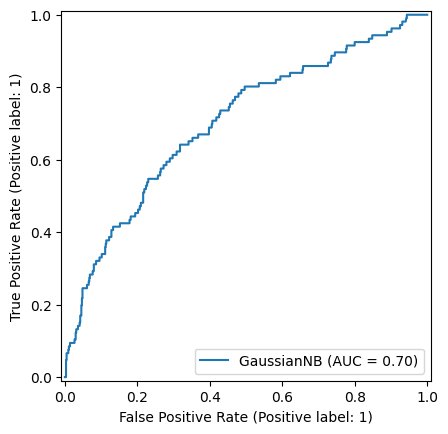

In [15]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
Navi_roc = RocCurveDisplay.from_estimator(nb, X_test_pca, y_test)

### K-Nearest Neighbors

In [16]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
K_Nearest_pread =knn.predict(X_test_pca)

In [17]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' :K_Nearest_pread })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
3446,0,0
3712,0,0
2899,1,0
1041,0,0
1152,0,0
...,...,...
3536,0,0
310,0,0
424,0,0
3563,0,0


              precision    recall  f1-score   support

           0       0.86      0.97      0.91       639
           1       0.26      0.07      0.11       106

    accuracy                           0.84       745
   macro avg       0.56      0.52      0.51       745
weighted avg       0.78      0.84      0.80       745



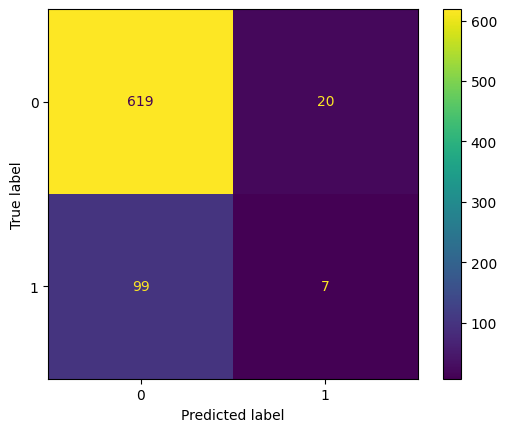

In [18]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, K_Nearest_pread, labels=knn.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=knn.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,K_Nearest_pread))

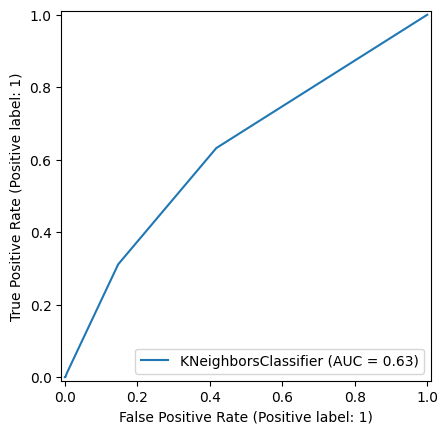

In [19]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
K_Nearest_roc = RocCurveDisplay.from_estimator(knn, X_test_pca, y_test)

### Hyperparameter Tuning for KNN

In [20]:
param_grid = {'n_neighbors': range(1, 30)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_pca, y_train)

print("Best K for KNN:", grid_knn.best_params_)

Best K for KNN: {'n_neighbors': 18}


In [21]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
new_knn = KNeighborsClassifier(n_neighbors=18)
new_knn.fit(X_train_pca, y_train)
new_K_Nearest_pread =new_knn.predict(X_test_pca)

In [22]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' :new_K_Nearest_pread })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
3446,0,0
3712,0,0
2899,1,0
1041,0,0
1152,0,0
...,...,...
3536,0,0
310,0,0
424,0,0
3563,0,0


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       639
           1       0.47      0.07      0.12       106

    accuracy                           0.86       745
   macro avg       0.67      0.53      0.52       745
weighted avg       0.81      0.86      0.81       745



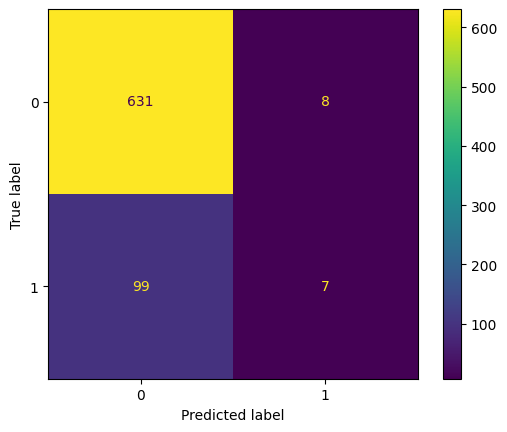

In [23]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, new_K_Nearest_pread, labels=new_knn.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=new_knn.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,new_K_Nearest_pread))

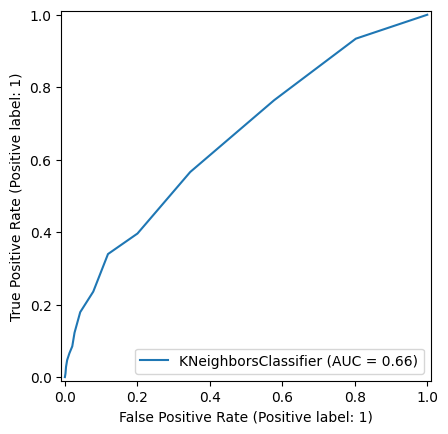

In [24]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
K_Nearest_roc = RocCurveDisplay.from_estimator(new_knn, X_test_pca, y_test)

### Hyperparameter Tuning for LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression

# Define the base model
new_lr = LogisticRegression(max_iter=1000)

# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],      # Inverse of regularization strength
    'penalty': ['l1', 'l2'],           # Regularization type
    'solver': ['liblinear']            # Solver compatible with both l1 and l2
}

# Initialize GridSearchCV
grid_search = GridSearchCV(new_lr, param_grid, cv=5, scoring='accuracy')

# Fit to PCA-transformed training data
grid_search.fit(X_train_pca, y_train)

# Get the best model
best_lr = grid_search.best_estimator_

# Predict on test data
lr_new_pred = best_lr.predict(X_test_pca)

# Show best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Accuracy: 0.8619891715075291


In [26]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' :lr_new_pred })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
3446,0,0
3712,0,0
2899,1,0
1041,0,0
1152,0,0
...,...,...
3536,0,0
310,0,0
424,0,0
3563,0,0


              precision    recall  f1-score   support

           0       0.87      0.99      0.92       639
           1       0.60      0.08      0.15       106

    accuracy                           0.86       745
   macro avg       0.73      0.54      0.54       745
weighted avg       0.83      0.86      0.81       745



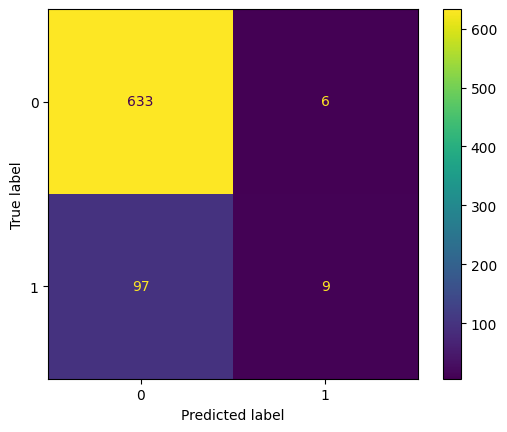

In [27]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, lr_new_pred, labels=best_lr.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=best_lr.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_new_pred))

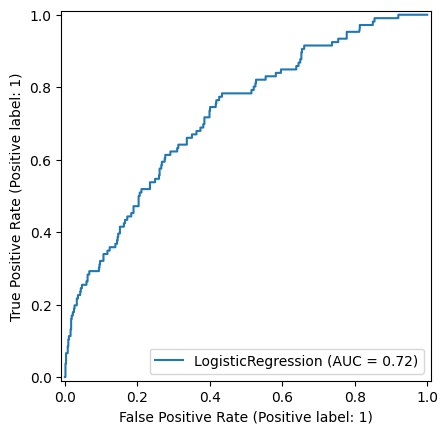

In [28]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
new_lr_roc = RocCurveDisplay.from_estimator(best_lr, X_test_pca, y_test)

### Hyperparameter Tuning for Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the model
new_nb = GaussianNB()

# Define parameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=new_nb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Best model
best_nb = grid_search.best_estimator_

# Predict with the best model
new_Naive_pred = best_nb.predict(X_test_pca)

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Best parameters: {'var_smoothing': 1e-09}
Best CV accuracy: 0.8314387231402629


In [38]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' :new_Naive_pred })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
3446,0,0
3712,0,0
2899,1,0
1041,0,0
1152,0,0
...,...,...
3536,0,0
310,0,0
424,0,0
3563,0,0


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       639
           1       0.40      0.25      0.31       106

    accuracy                           0.84       745
   macro avg       0.64      0.60      0.61       745
weighted avg       0.81      0.84      0.82       745



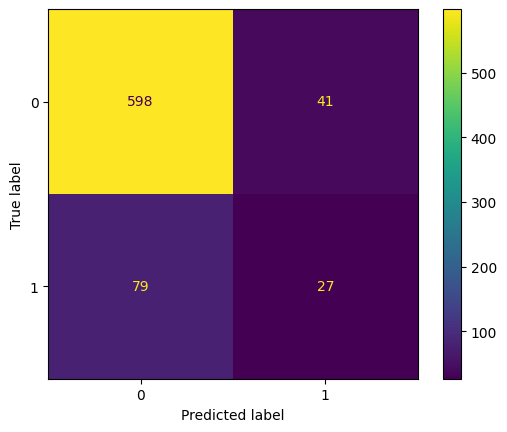

In [39]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, new_Naive_pred, labels=best_nb.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=best_nb.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,new_Naive_pred))

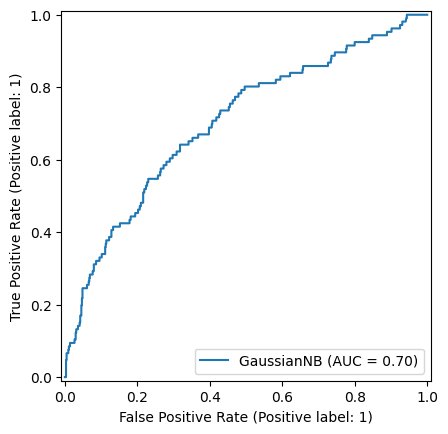

In [40]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
new_lr_roc = RocCurveDisplay.from_estimator(best_nb, X_test_pca, y_test)

### Final Summary

In [41]:
print("\nSUMMARY")
print("- Applied StandardScaler and PCA (5 components).")
print("- Trained 3 classifiers: Logistic Regression, Naive Bayes, KNN.")
print("- Evaluated with Accuracy, Precision, Recall, F1, Confusion Matrix, ROC AUC.")
print("- Tuned KNN , LogisticRegression and Naive Bayes using GridSearchCV.")


SUMMARY
- Applied StandardScaler and PCA (5 components).
- Trained 3 classifiers: Logistic Regression, Naive Bayes, KNN.
- Evaluated with Accuracy, Precision, Recall, F1, Confusion Matrix, ROC AUC.
- Tuned KNN , LogisticRegression and Naive Bayes using GridSearchCV.
